In [21]:
import binascii
import os
import time
import numpy as np
# try:
    # Seed with enough bytes to span the 19937 bit
    # state space for the Mersenne Twister
a = int(binascii.hexlify(os.urandom(2500)),16) 

OverflowError: integer division result too large for a float

In [4]:
try:
    # Seed with enough bytes to span the 19937 bit
    # state space for the Mersenne Twister
    a = int(_hexlify(_urandom(2500)), 16)
except NotImplementedError:
    import time
    a = int(time.time() * 256) # use fractional seconds


NameError: name '_hexlify' is not defined

In [2]:
import pandas as pd

TRAININFO = "/data/HitSongPrediction/train_info.tsv"
TRAINRANK =  "/data/HitSongPrediction/train_rank.csv"
TESTINFO = "/data/HitSongPrediction/test_info.tsv"
SUBMISSION = "/data/HitSongPrediction/submission.csv"

In [3]:
df_i = pd.read_csv(TRAININFO, delimiter='\t',encoding='utf-8')
df_r = pd.read_csv(TRAINRANK)
df_i_train = df_i.merge(df_r, left_on='ID', right_on='ID')
df_i_train["dataset"] = "train"

df_i_test = pd.read_csv(TESTINFO, delimiter='\t',encoding='utf-8')
df_i_test["label"] = -1
df_i_test["dataset"] = "test"

df = pd.concat([df_i_train, df_i_test])
print(len(df))
df_track_info = pd.read_csv("../csv/all_track_info.csv")
df = df.merge(df_track_info, left_on='ID', right_on='ID')
df_audio_features = pd.read_csv("../csv/all_track_audio_features.csv")
df =df.merge(df_audio_features,left_on="ID",right_on="ID", how="left")
# for i,o in df.iterrows():
#     print(o.album,"--------------------------",o.album_artist,"----",o.artist_name,"--",o.label)
df.columns
# print(len(df))
df.head(10)

10196


,ID,title,artist_name,artist_id,composers_name,composers_id,release_time,label,dataset,Unnamed: 0_x,...,tonal.tuning_frequency,tonal.tuning_nontempered_energy_ratio,tonal.chords_key,tonal.chords_scale,tonal.key_edma.key,tonal.key_edma.scale,tonal.key_krumhansl.key,tonal.key_krumhansl.scale,tonal.key_temperley.key,tonal.key_temperley.scale
0,1073748245,Đêm Chôn Dầu Vượt Biển,Như Quỳnh,551,Châu Đình An,5765,2017-10-01 22:07:00,7,train,5321,...,440.000000,0.601478,D,major,G,major,G,major,G,major
1,1073751978,Mùa Thu Trong Mưa,Minh Tuyết,455,Trường Sa,100105,2017-10-01 20:58:00,3,train,8946,...,434.193115,0.944516,C,minor,C,minor,C,minor,C,minor
2,1073835561,Rồi Ánh Trăng Tan,Lưu Bích,450,Quốc Bảo,4355,2017-11-01 18:16:00,6,train,8159,...,434.193115,0.957651,Bb,major,D,minor,D,minor,D,minor
3,1073856553,Còn Thương Rau Đắng Mọc Sau Hè,Như Quỳnh,551,Bắc Sơn,7686,2017-11-01 17:36:00,2,train,3874,...,441.272583,0.796499,G,minor,G,minor,G,minor,G,minor
4,1073929630,Người Điên Biết Yêu,Như Loan,513,Lê Minh Kha,100466,2017-11-01 17:49:00,7,train,5631,...,434.946167,0.860068,A,minor,D,minor,D,minor,D,minor
5,1073929880,Đàn Bà,Don Hồ,6515,Song Ngọc,100288,2017-10-01 21:33:00,3,train,7447,...,436.960693,0.768609,A,minor,D,minor,A,minor,A,minor
6,1073949310,Yêu Một Người Sống Bên Một Người,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,4,train,3052,...,442.548920,0.701749,D,minor,A,minor,A,minor,A,minor
7,1073994297,Mất Nhau Trong Đời,Minh Tuyết,455,Huỳnh Nhật Tân,100306,2017-11-01 18:27:00,8,train,6303,...,434.193115,0.913990,C,minor,C,minor,C,minor,C,minor
8,1073994298,Những Ân Tình Xưa,"Minh Tuyết, Bằng Kiều",455.306,Hoài An,100133,2017-11-01 18:27:00,4,train,593,...,437.971466,0.726335,A,minor,A,minor,A,minor,A,minor
9,1073994300,Ở Nơi Đó Em Cười,Minh Tuyết,455,Hoài An,100133,2017-11-01 18:27:00,8,train,8982,...,437.718536,0.732484,A,minor,D,minor,D,minor,A,minor


In [4]:
len(df.copyright.unique())

8

# Fill Nan values

In [5]:
# Fill nan album
print("There is {} ratio is nan album".format(len(df[df["album"].isnull()])/len(df)))
df["album"]  = df["album"].fillna("")
df["len_album_name"] = df["album"].apply(lambda x: len(x.split(" ")))
df["isRemixAlbum"] = [ 1 if "Remix" in t else 0 for t in df["album"]]
df["isOSTAlbum"] = [ 1 if "OST" in t else 0 for t in df["album"]]
df["isSingleAlbum"] = [ 1 if "Single" in t else 0 for t in df["album"]]
df["isBeatAlbum"] = [ 1 if "Beat" in t else 0 for t in df["album"]]
df["isTopHitAlbum"] = [ 1 if "Top Hits" in t else 0 for t in df["album"]]
df["isCoverAlbum"] = [ 1 if "Cover" in t else 0 for t in df["album"]]
df["isEPAlbum"] = [ 1 if "EP" in t else 0 for t in df["album"]]



df["album_name_is_title_name"]= [1 if r.title in r.album  else 0 for i,r in df.iterrows() ]
df["album"] = df["album"].astype('category')
df["album"] =  df["album"].cat.codes

There is 0.24038838760298156 ratio is nan album


In [6]:
df["artist_name_cat"] = df["artist_name"].astype('category')
df["artist_name_cat"] =  df["artist_name_cat"].cat.codes

df["composers_name_cat"] = df["composers_name"].astype('category')
df["composers_name_cat"] =  df["composers_name_cat"].cat.codes

df["copyright_cat"] = df["copyright"].astype('category')
df["copyright_cat"] =  df["copyright_cat"].cat.codes


In [7]:
import re
import numpy as np
def get_min_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.min(ps)

def get_max_artist_id(s):
    ps = re.split(',|\.',s)
    ps = [int(p) for p in ps]
    return np.max(ps)

df["artist_id_min"]=  df["artist_id"].apply(lambda x: get_min_artist_id(x))
df["artist_id_min_cat"] = df["artist_id_min"].astype('category')
df["artist_id_min_cat"] =  df["artist_id_min_cat"].cat.codes
print(df[["artist_id_min", "artist_id_min_cat"]])

df["composers_id_min"]=  df["composers_id"].apply(lambda x: get_min_artist_id(x))
df["composers_id_min_cat"] = df["composers_id_min"].astype('category')
df["composers_id_min_cat"] =  df["composers_id_min_cat"].cat.codes

df["artist_id_max"]=  df["artist_id"].apply(lambda x: get_max_artist_id(x))
df["artist_id_max_cat"] = df["artist_id_max"].astype('category')
df["artist_id_max_cat"] =  df["artist_id_max_cat"].cat.codes

df["composers_id_max"]=  df["composers_id"].apply(lambda x: get_max_artist_id(x))
df["composers_id_max_cat"] = df["composers_id_max"].astype('category')
df["composers_id_max_cat"] =  df["composers_id_max_cat"].cat.codes

       artist_id_min  artist_id_min_cat
0                551                 60
1                455                 39
2                450                 36
3                551                 60
4                513                 55
...              ...                ...
10191         650851               1759
10192         650627               1757
10193         618837               1720
10194         653359               1762
10195         658098               1763

[10196 rows x 2 columns]


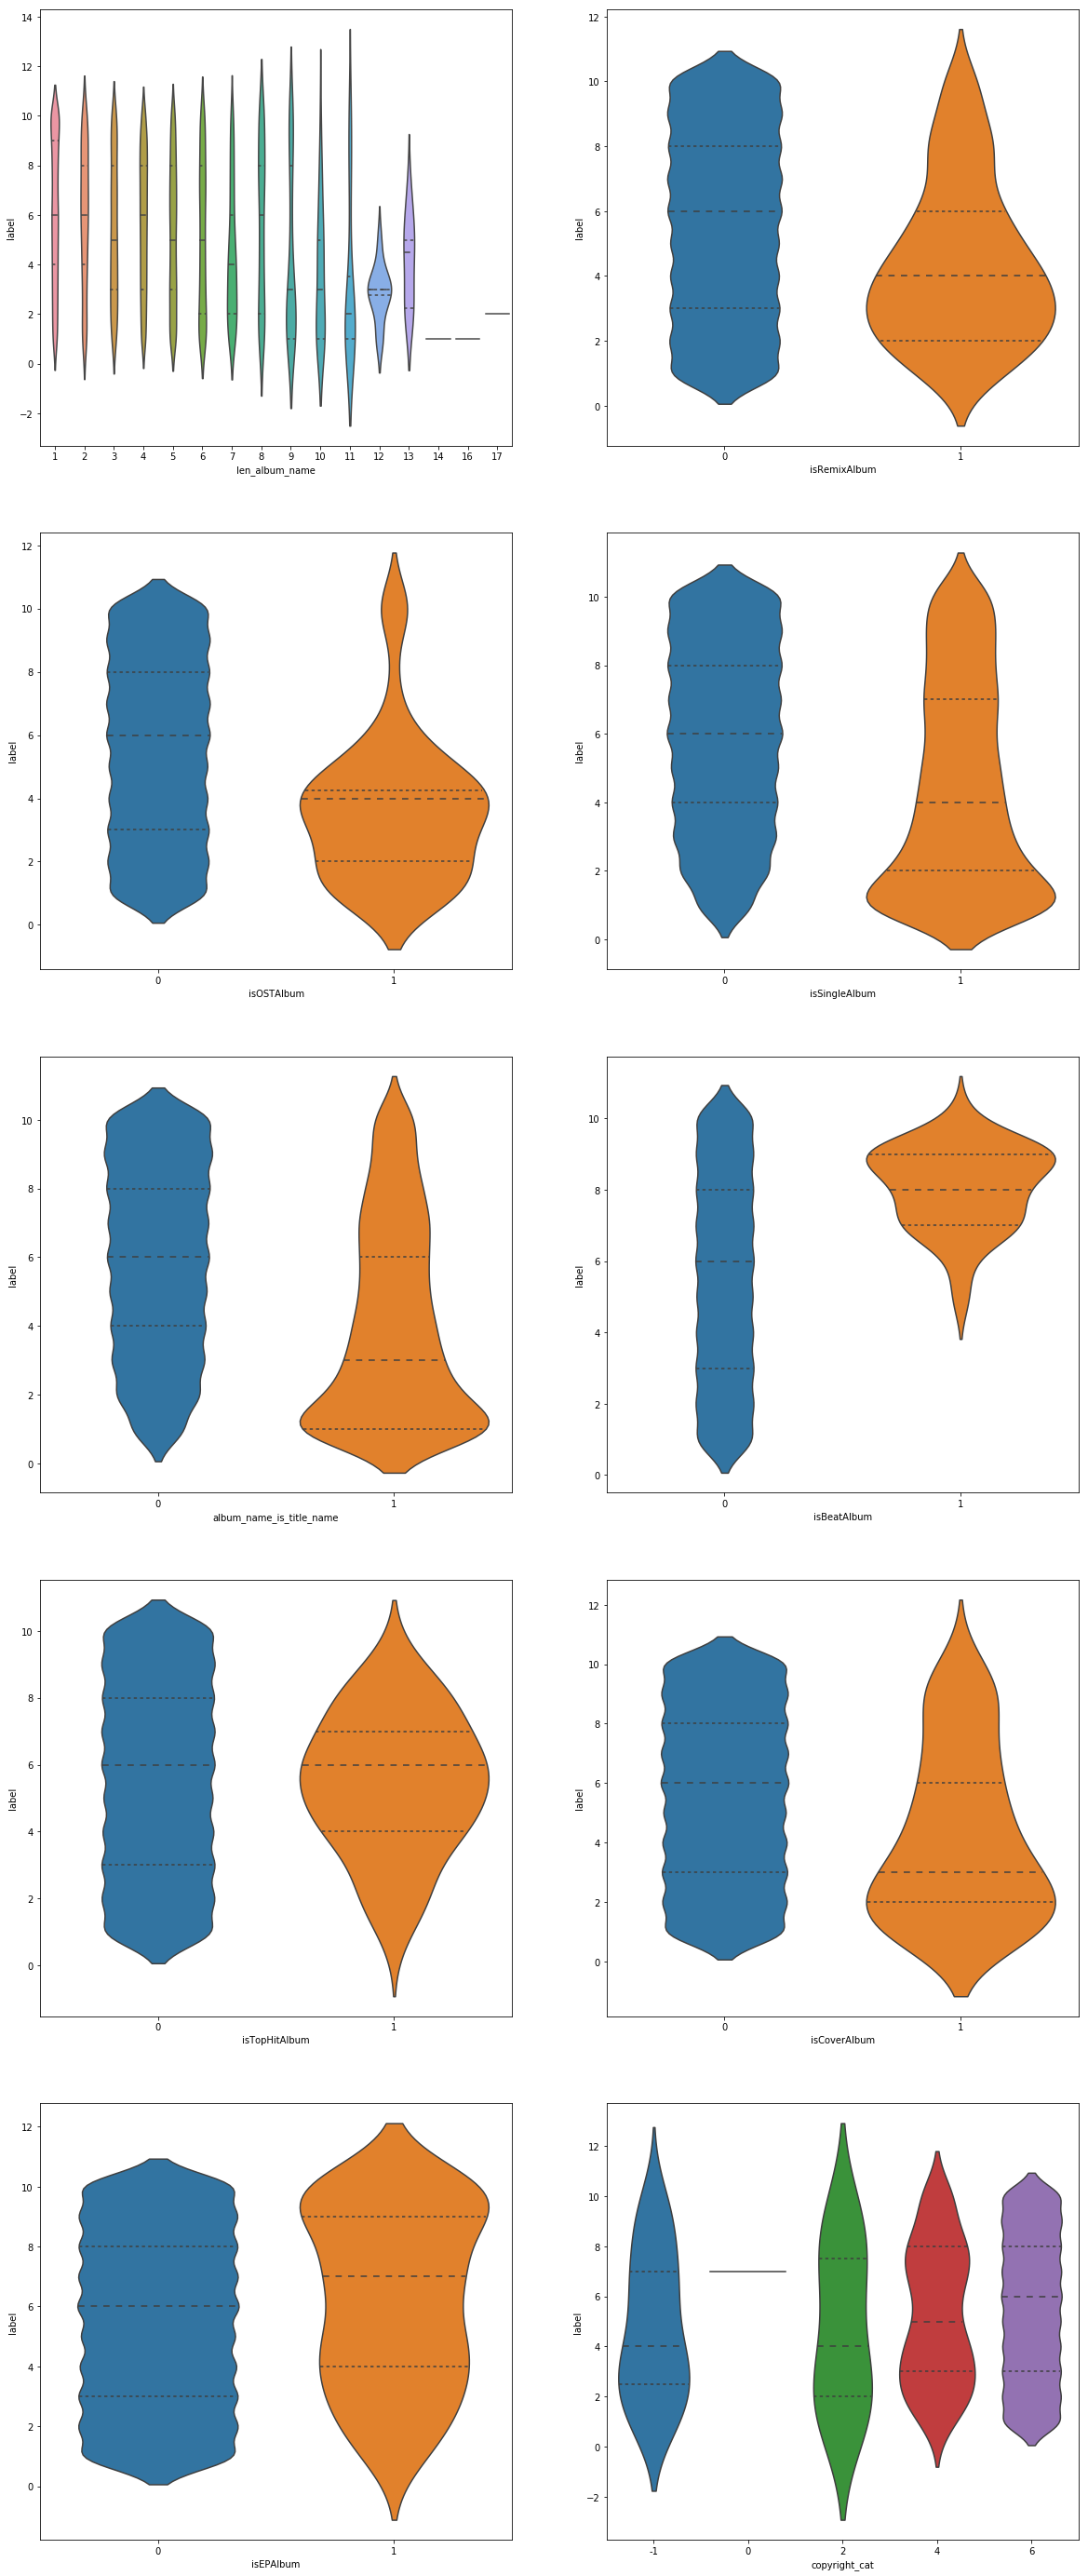

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

title_features = ["len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", 
                  "album_name_is_title_name", "isBeatAlbum", "isTopHitAlbum", "isCoverAlbum", "isEPAlbum","copyright_cat"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df[df.dataset=="train"], inner="quartile",ax=ax)



In [11]:
# Fill genre
print("There is {} ratio is nan genre".format(len(df[df["genre"].isnull()])/len(df)))
df["genre"]  = df["genre"].fillna("No genre")
df["genre"] = df["genre"].astype('category')
df["genre"] =  df["genre"].cat.codes

There is 0.0 ratio is nan genre


In [12]:
# Fill album_artist
print("There is {} ratio is nan album_artist".format(len(df[df["album_artist"].isnull()])/len(df)))
df["album_artist"]  = df["album_artist"].fillna("No album_artist")
df["album_artist_contain_artistname"]= [1 if r.album_artist in r.artist_name  else 0 for i,r in df.iterrows() ]
df["album_artist"] = df["album_artist"].astype('category')
df["album_artist"] =  df["album_artist"].cat.codes

There is 0.24038838760298156 ratio is nan album_artist


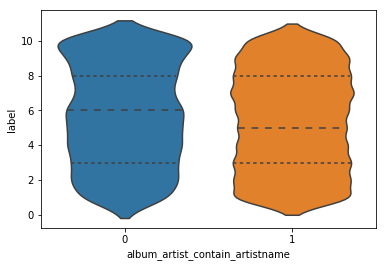

In [13]:
import seaborn as sns

sns.violinplot(x="album_artist_contain_artistname", y="label", data=df[df.dataset=="train"], inner="quartile")


There is 0.0007846214201647705 ratio is nan track
[1.]


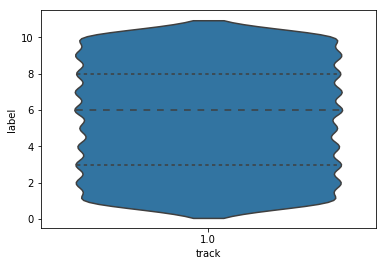

In [14]:
# Fill track
print("There is {} ratio is nan track".format(len(df[df["track"].isnull()])/len(df)))
df["track"]  = df["track"].fillna("(1,1)")
def tracknum_to_value(track_num):
    try:
        
        track_num = make_tuple(track_num)
        if track_num[0] is not None:
            return float(track_num[0]) / float(track_num[1])
        else:
            return 1.0
    except:
        return 1.0

df["track"] = df["track"].apply(lambda t: tracknum_to_value(t))
print(df["track"].unique())
sns.violinplot(x="track", y="label", data=df[df.dataset=="train"], inner="quartile")


There is 0.6722244017261672 ratio is nan lyric


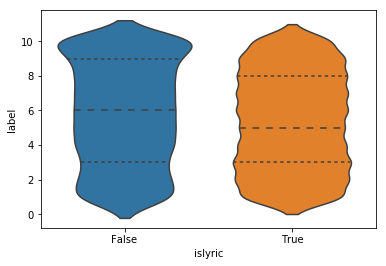

In [15]:
# Fill lyric
print("There is {} ratio is nan lyric".format(len(df[df["lyric"].isnull()])/len(df)))
df["lyric"]  = df["lyric"].fillna("")
df["islyric"] = df["lyric"].apply(lambda x: not len(x))

sns.violinplot(x="islyric", y="label", data=df[df.dataset=="train"], inner="quartile")



In [16]:
low_level_features =  [f for f in df.columns.values if "lowlevel" in f]
df[low_level_features] = df[low_level_features].fillna(df[low_level_features].mean())

# title_features = low_level_features
# for feature in title_features:
#     sns.jointplot(x=feature, y="label", data=df_train,kind="kde", space=0, color="g")    

In [17]:
rhythm_features =  [f for f in df.columns.values if "rhythm" in f]
df[rhythm_features] = df[rhythm_features].fillna(df[rhythm_features].mean())

# title_features = rhythm_features
# for feature in title_features:
#     sns.jointplot(x=feature, y="label", data=df_train,kind="kde", space=0, color="g")    

In [18]:
tonal_numeric_feature = ['tonal.chords_changes_rate',
 'tonal.chords_number_rate',
 'tonal.chords_strength.mean',
 'tonal.chords_strength.stdev',
 'tonal.hpcp_crest.mean',
 'tonal.hpcp_crest.stdev',
 'tonal.hpcp_entropy.mean',
 'tonal.hpcp_entropy.stdev',
 'tonal.key_edma.strength',
 'tonal.key_krumhansl.strength',
 'tonal.key_temperley.strength',
 'tonal.tuning_diatonic_strength',
 'tonal.tuning_equal_tempered_deviation',
 'tonal.tuning_frequency',
 'tonal.tuning_nontempered_energy_ratio',
]

df[tonal_numeric_feature] = df[tonal_numeric_feature].fillna(df[tonal_numeric_feature].mean())

# title_features = tonal_numeric_feature
# for feature in title_features:
#     sns.jointplot(x=feature, y="label", data=df_train,kind="kde", space=0, color="g")    

In [19]:
tonal_category_feature = [
'tonal.chords_key',
 'tonal.chords_scale',
 'tonal.key_edma.key',
 'tonal.key_edma.scale',
 'tonal.key_krumhansl.key',
 'tonal.key_krumhansl.scale',
 'tonal.key_temperley.key',
 'tonal.key_temperley.scale',
]

for f in tonal_category_feature:
    df[f] = df[f].fillna("No Key")
    df[f] = df[f].astype('category')
    df[f] = df[f].cat.codes
    
# title_features = tonal_category_feature
# fig, axes = plt.subplots(5, 2, figsize=(20, 50))
# for feature, ax in zip(title_features, axes.flat):
#     sns.violinplot(x=feature, y="label", data=df_train, inner="box",ax=ax)    

In [20]:
df.columns[df.isna().any()].tolist()

['copyright', 'Unnamed: 0_y']

# Data exploration
Ideas: + Frequency of aritist id and composers id
       + range of ranks of song group by artist id and composer id
       + Len of the song to label
       + hour of release time or month of release time or year
       + Type of music based on file name
       + Vector text features of name of the song
       + Len of name of the song
       + Number of artist or composer of the song
       + How many song the same type, artit, composer in this period of 6 month
       + Rithms of the song, high node on the song, max - min of node on the song

# Create features 

In [29]:
from dateutil import relativedelta
from datetime import datetime
from sklearn.preprocessing import LabelEncoder
from ast import literal_eval as make_tuple
df['no_artist'] = df.artist_name.apply(lambda x: len(x.split(",")))
df['no_composer'] = df.composers_name.apply(lambda x: len(x.split(",")))
df["freq_artist"] = df.groupby('artist_id')['artist_id'].transform('count')
df["freq_composer"] = df.groupby('composers_id')['composers_id'].transform('count')
df["datetime"] = pd.to_datetime(df.release_time)
df["year"] = df["datetime"].dt.year
df["month"] = df["datetime"].dt.month
df["hour"] = df["datetime"].dt.hour
df["day"] = df["datetime"].dt.day
df["dayofyear"] = df["datetime"].dt.dayofyear
df["len_of_songname"] = df["title"].apply(lambda x: len(x.split(" ")))
df["isRemix"] = [ 1 if "Remix" in t else 0 for t in df["title"]]
df["isOST"] = [ 1 if "OST" in t else 0 for t in df["title"]]
df["isBeat"] = [ 1 if "Beat" in t else 0 for t in df["title"]]
df["isVersion"] = [ 1 if "Version" in t else 0 for t in df["title"]]
df["isCover"] = [ 1 if "Cover" in t else 0 for t in df["title"]]



df["Anh"] = [ 1 if "Anh" in t else 0 for t in df["title"]]
df["Em"] = [ 1 if "Em" in t else 0 for t in df["title"]]
df["Tinh"] = [ 1 if "Tình" in t else 0 for t in df["title"]]
df["Xuan"] = [ 1 if "Xuân" in t else 0 for t in df["title"]]
df["Khong"] = [ 1 if "Không" in t else 0 for t in df["title"]]


def find_num_song_release_in_final_month(df, day):
    month5th = day + relativedelta.relativedelta(months=5)
    month6th = day + relativedelta.relativedelta(months=6)  
    return len(df.datetime[(df.datetime >= month5th)&(df.datetime<=month6th)])



df["num_song_release_in_final_month"] = df.datetime.apply(lambda d:find_num_song_release_in_final_month(df ,d))


df_train = df[df.dataset=="train"]
df_test = df[df.dataset=="test"]

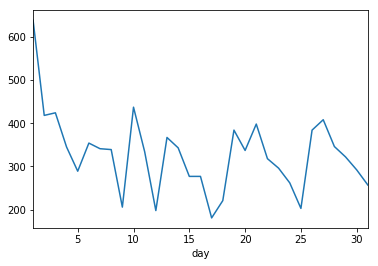

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


group_album = df_train.groupby("album")["album"].count().sort_values(ascending=False)
print(group_album[:9])
top5_popular_album = list(group_album.keys()[:9])



sns.violinplot(x="album", y="label", data=df_train[df_train.album.isin(top5_popular_album)], inner="box")
# for i, r in enumerate(group_no_artist):
#     print(r)
# explode = np.zeros(len(list(group_no_artist.keys())))
# explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
# plt.pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


group_album_artist = df_train.groupby("album_artist")["album_artist"].count().sort_values(ascending=False)
print(group_album_artist[:9])
top5_popular_albumn_artist = list(group_no_artist.keys()[:9])



sns.violinplot(x="album_artist", y="label", data=df_train[df_train.album_artist.isin(top5_popular_albumn_artist)], inner="box")
# for i, r in enumerate(group_no_artist):
#     print(r)
# explode = np.zeros(len(list(group_no_artist.keys())))
# explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
# plt.pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


group_album_artist = df_train.groupby("album_artist")["album_artist"].count().sort_values(ascending=False)
top5_popular_albumn_artist = list(group_no_artist.keys()[:5])


sns.violinplot(x="album_artist", y="label", data=df_train[df_train.album_artist.isin(top5_popular_albumn_artist)], inner="box")

# for i, r in enumerate(group_no_artist):
#     print(r)
# explode = np.zeros(len(list(group_no_artist.keys())))
# explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
# plt.pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))


In [ ]:
arts

In [ ]:
group_no_artist = df_train.groupby("album_artist")[["album_artist","artist_name","label"]]
group_no_artist.head(3000)

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df["num_song_release_in_final_month"])
plt.show()

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.violinplot(x="genre", y="label", data=df_train, inner="box")

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.jointplot(x="length", y="label", data=df_train,kind="kde", space=0, color="g")

In [ ]:
fig = plt.figure(figsize=(10,10))
sns.jointplot(x="track_value", y="label", data=df_train,kind="kde", space=0, color="g")
# print(df_train.track_value.unique())

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
sns.jointplot(x="num_song_release_in_final_month", y="label", data=df_train,kind="kde", space=0, color="g")


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator



# Display the generated image:
fig, ax= plt.subplots(1,2,figsize=(40,40))

ax = ax.flat

corpus = df_train[df_train.label >7].title.values
text = ""
for c in corpus:
    text +=c
wordcloud = WordCloud().generate(text)
ax[0].imshow(wordcloud, interpolation='bilinear')
ax[0].axis("off")
ax[0].set_title("Top word in top >3", fontsize=30)


corpus = df_train[df_train.label <=3].title.values
text = ""
for c in corpus:
    text +=c
wordcloud1 = WordCloud().generate(text)
ax[1].imshow(wordcloud1, interpolation='bilinear')
ax[1].axis("off")
ax[1].set_title("Top word in top 3",fontsize=30)


In [ ]:
corpus = df.title.values
vectorizer = TfidfVectorizer()
vectorizer.fit(corpus)
X = vectorizer.transform(["Còn Thương Rau Đắng Mọc Sau Hè","Anh Em Remix", "Tình Hậu Phương", "OST"])
# print(vectorizer.get_feature_names())
# print(X.shape)
print(X)

In [ ]:
a= df[df["label"]>=5][["title", "label","release_time"]]

for i,o in a.iterrows():
    print(o.title,"--------------------------",o.label,"------", o.release_time)
    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

title_features = ["isRemix", "isOST", "isBeat", "isVersion", "isCover", "Anh", "Em", "Tình", "Xuân", "Không"]
fig, axes = plt.subplots(5, 2, figsize=(20, 50))
for feature, ax in zip(title_features, axes.flat):
    sns.violinplot(x=feature, y="label", data=df_train, inner="quartile",ax=ax)


In [ ]:
import regex



In [ ]:
odd_name = df[df.len_of_songname > 6][["title", "label"]]
for i,o in odd_name.iterrows():
    print(o.title,"--------------------------",o.label)
    if(  "Remix" in o.title):
        print("Contain Remix")

In [ ]:
print(set(df.len_of_songname))
fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot(x="len_of_songname", y="label", data=df_train, inner="quartile",ax=ax[0])
group_no_artist = df_train.groupby("len_of_songname")["len_of_songname"].count()
explode = np.zeros(len(list(group_no_artist.keys())))
explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
ax[1].pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))
ax[1].set_title("Number of len_of_songname in every song")
plt.plot()

# Number of artists perform the song / ranks

[]

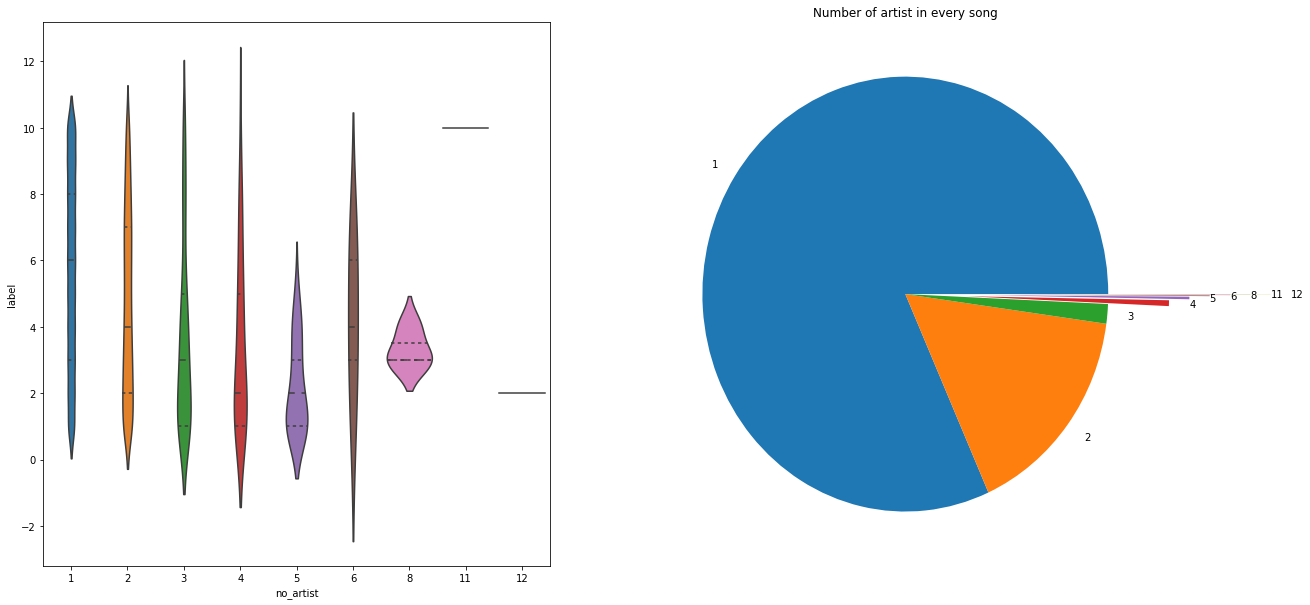

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,2,figsize=(20,10))

sns.violinplot(x="no_artist", y="label", data=df_train, inner="quartile",ax=ax[0])
group_no_artist = df_train.groupby("no_artist")["no_artist"].count()
explode = np.zeros(len(list(group_no_artist.keys())))
explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
ax[1].pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))
ax[1].set_title("Number of artist in every song")
plt.plot()

# Number of composers per the song 

[]

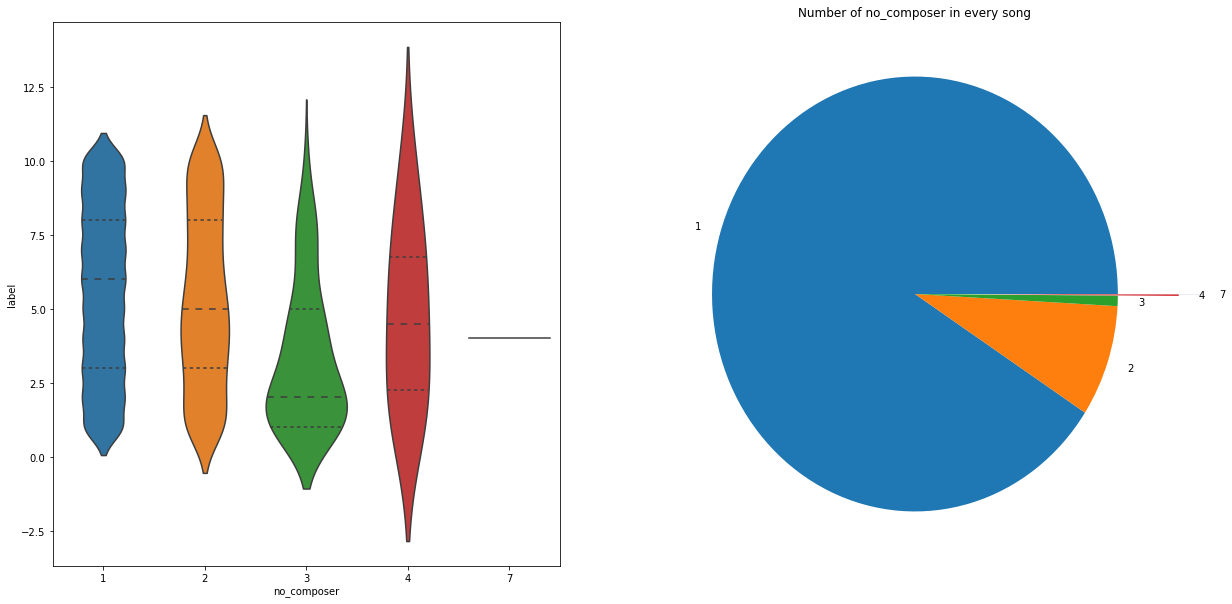

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2,figsize=(20,10))
sns.violinplot(x="no_composer", y="label", data=df_train, inner="quartile",ax=ax[0])
group_no_artist = df_train.groupby("no_composer")["no_composer"].count()
explode = np.zeros(len(list(group_no_artist.keys())))
explode = [i/10 if i>2 else 0for i,e in enumerate(explode)]
ax[1].pie(group_no_artist, explode=explode, labels=list(group_no_artist.keys()))
ax[1].set_title("Number of no_composer in every song")
plt.plot()

# Frequency of artist and composers

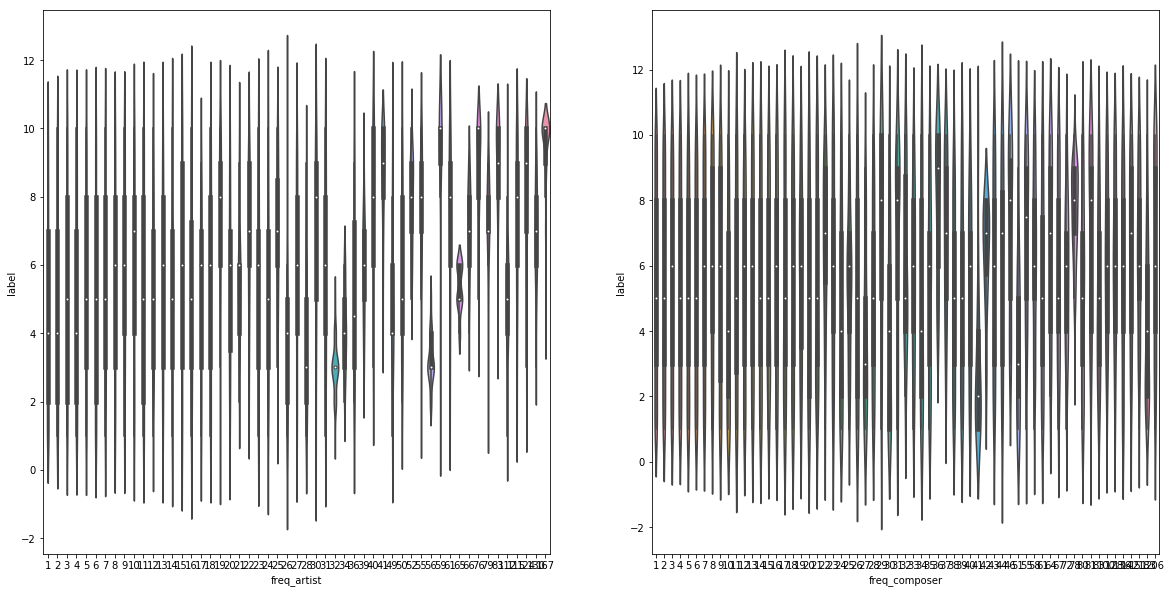

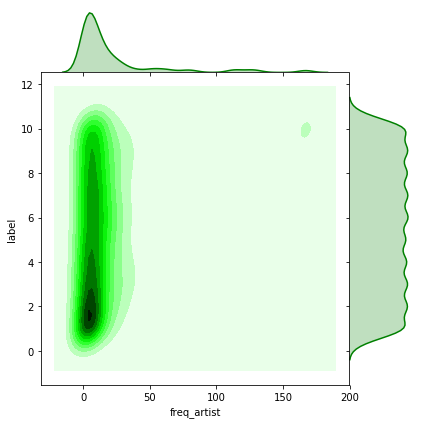

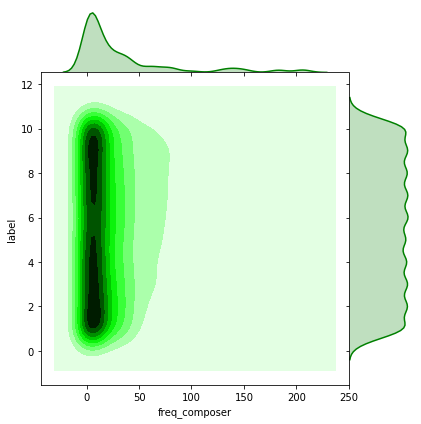

In [60]:


fig , ax = plt.subplots(1,2, figsize=(20,10))
ax = ax.flat
sns.jointplot(x="freq_artist", y= "label",data=df_train,kind="kde", space=0, color="g")
sns.violinplot(x="freq_artist",y="label", data=df_train, ax=ax[0])
sns.jointplot(x="freq_composer", y= "label",data=df_train,kind="kde", space=0, color="g")
sns.violinplot(x="freq_composer",y="label", data=df_train, ax=ax[1])

# Time

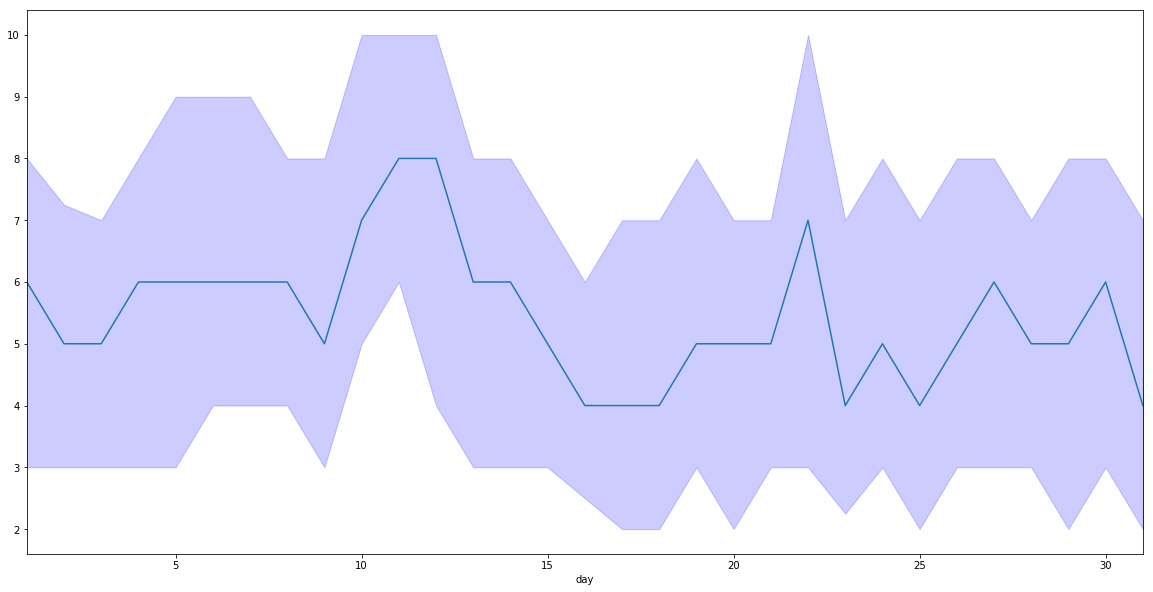

In [58]:
fig = plt.figure(figsize=(20,10))

column_groupby = [ "day"]
quantile25 = df_train.sort_values(by='datetime').groupby(column_groupby).label.quantile(0.25)
quantile75 = df_train.sort_values(by='datetime').groupby(column_groupby).label.quantile(0.75)
mean = df_train.sort_values(by='datetime').groupby(column_groupby).label.median().plot()

# print(mean)
if quantile25.index.nlevels> 1:
    index = quantile25.index.droplevel()
else:
    index = quantile25.index

plt.fill_between(range(1,len(index)+1), quantile25,quantile75,color='b', alpha=0.2)

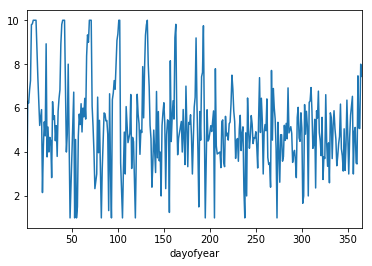

In [52]:
df_train.groupby(df_train.dayofyear).label.mean().plot()

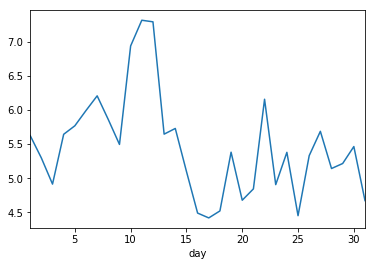

In [53]:
#Thea average rank over day of the month
df_train.groupby(df_train.day).label.mean().plot()
# data1.groupby(data1.release_time.dt.month).label.mean().plot()

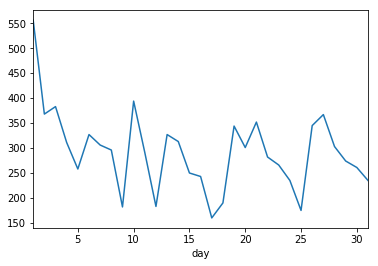

In [54]:
# The number ofreleases for dayof the  month
df_train.groupby(["day"]).count()['ID'].plot()

In [ ]:
from sklearn.model_selection import train_test_split

# chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day"]
chosen_features = ["no_artist", "no_composer","freq_artist", "freq_composer","year", "month","hour", "day", "len_of_songname", 
                   "isRemix", "isOST", "isBeat", "isVersion", "isCover",  "num_song_release_in_final_month",
                  "length", "genre", "track","album_artist","album", "islyric", "album_artist_contain_artistname",
                  "len_album_name", "isRemixAlbum", "isOSTAlbum", "isSingleAlbum", "album_name_is_title_name",
                  "isBeatAlbum", "isCoverAlbum", "artist_name_cat","composers_name_cat","copyright_cat" ,
                  "artist_id_min_cat", "composers_id_min_cat",  "artist_id_max_cat", "composers_id_max_cat"]

# chosen_features = []

# chosen_features += [f for f in df.columns.values if "lowlevel" in f]
# chosen_features += [f for f in df.columns.values if "rhythm" in f]
# chosen_features += [f for f in df.columns.values if "tonal" in f]
# chosen_features += ["rhythm.onset_rate", "rhythm.bpm_histogram_second_peak_bpm",
#                     "rhythm.bpm_histogram_second_peak_spread", 
#                     "rhythm.bpm_histogram_second_peak_weight", "rhythm.beats_count"]

print(chosen_features)

X = df_train[chosen_features]
y = df_train.label
df1 = X[X.isna().any(axis=1)]
print(df1)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(10,10))

cor = df_train[chosen_features+["label"]].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
#Correlation with output variable
cor_target = abs(cor["label"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.001]
print(relevant_features)
plt.figure(figsize=(10,10))

cor1 = df_train[relevant_features.keys()].corr()
sns.heatmap(cor1, annot=True, cmap=plt.cm.Reds)
plt.show()

In [ ]:
import seaborn as  sns

sns.jointplot(x="rhythm.danceability", y= "label",data=df_train,kind="kde", space=0, color="g")
# sns.violinplot(x="rhythm.bpm",y="label", data=df_train)

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
from math import sqrt
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes, scoring="r2")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


from sklearn import svm
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(max_depth=20, random_state=0,n_estimators=1000)
# plot_learning_curve(clf, "Learning Curves (Naive Bayes)", X_train,y_train,cv=5, n_jobs=4)
clf.fit(X_train, y_train)

pre = clf.predict(X_train)
error = sqrt(mean_squared_error(y_train, pre))
print("RMSE: ",error)
plt.hist(pre)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

param = {
    'bagging_freq': 3,          
    'bagging_fraction': 0.95,   'boost_from_average':'false',   
    'boost': 'gbdt',             'feature_fraction': 1,     'learning_rate': 0.001,
    'max_depth': -1,             'metric':'root_mean_squared_error', 'min_data_in_leaf': 80,   
    'min_sum_hessian_in_leaf': 20.0,   'num_leaves': 13,            
    'num_threads': 8,              'tree_learner': 'serial',   'objective': 'regression',
    'reg_alpha': 0.1302650970728192, 'reg_lambda': 0.3603427518866501,'verbosity': 1
}

folds = StratifiedKFold(n_splits=5, shuffle=True, random_state=99999)
oof = np.zeros(len(df_train))
predictions = np.zeros(len(df_test))
labels= df_train.label
for fold_, (trn_idx, val_idx) in enumerate(folds.split(df_train.values, df_train.label.values)):
    print("Fold {}".format(fold_))
    trn_data = lgb.Dataset(df_train.iloc[trn_idx][chosen_features], label=labels.iloc[trn_idx])
    val_data = lgb.Dataset(df_train.iloc[val_idx][chosen_features], label=labels.iloc[val_idx])
    clf = lgb.train(param, trn_data, 1000000, valid_sets = [trn_data, val_data], verbose_eval=5000, early_stopping_rounds = 20000)
    oof[val_idx] = clf.predict(df_train.iloc[val_idx][chosen_features], num_iteration=clf.best_iteration)
    predictions += clf.predict(df_test[chosen_features], num_iteration=clf.best_iteration) / folds.n_splits
print("RMSE: {:<8.5f}".format(sqrt(mean_squared_error(df_train.label, oof))))

sub = pd.DataFrame({"ID": df_test.ID.values})
sub["label"] = predictions
sub.to_csv("submission_lightgbm.csv", index=False, header=False)

In [ ]:
from sklearn.metrics import mean_squared_error
pre = clf.predict(X_valid)
error = sqrt(mean_squared_error(y_valid, pre))
print("RMSE: ",error)
plt.hist(pre)

In [ ]:
r = {}
for yt, yp  in zip(y_valid, pre):
    if yt in sorted(r.keys()):
        r[yt].append(yp)
    else:
        r[yt] = [yp]

x1 = sorted(r.keys())
values = r.values()
means= [np.mean(value) for value in values]
mi= [np.min(value) for value in values]
ma= [np.max(value) for value in values]
quan25= [np.quantile(value, 0.1) for value in values]
quan75= [np.quantile(value, 0.9) for value in values]

fig = plt.figure(figsize=(10,7))
plt.plot(x1, means, label="Mean Rank prediction")
plt.fill_between(x1, mi,ma,color='b', alpha=0.2 , label="Min-Max Rank prediction")
plt.fill_between(x1, quan25,quan75,color='r', alpha=0.5 ,label="10-th to 90-th Rank prediction")
plt.legend(loc='upper left')
plt.xlabel("Actual Rank")
plt.ylabel("Predicted Rank")

    

In [ ]:
X_test = df_test[chosen_features]
predictions = clf.predict(X_test)

df_result = pd.DataFrame(data={"ID":df_test.ID, "label":predictions})
df_result.to_csv("submission.csv", index=False, header=False)

In [ ]:
for i in range(len(a)):
    for j in range(100):
        a[i].

In [ ]:
np.append([[1, 2, 3],3], axis=0)

In [ ]:
import numpy as np
import cv2
a = np.zeros((20,100,3))
print(a.shape)